In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Análise I - Eficiência de Automóveis

Toda análise de dados fica muito mais simples se partirmos da necessidade de provar ou desprovar um hipótese. Essa hipótese serve como guia para nossos primeiros passos na análise, e, conforme trabalhamos o conjunto de dados, vamos complementando-a ou mesmo formulando novas hipóteses que queremos explorar.

Vamos começar com uma hipótese dada: *a eficiência (em termos de consumo de combustível) dos motores de automóveis aumentou ao longo dos anos*. 

In [2]:
tb_veic = pd.read_csv("data/dados_veiculos.csv")
pattern = r"[^a-zA-Z0-9]"
tb_veic.columns = [re.sub(pattern, "_", column.lower()) for column in tb_veic.columns]
tb_veic.describe()

,year,engine_displacement,cylinders,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [3]:
tb_veic.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


## Avaliação inicial

Nosso conjunto de dados contém 3 variáveis que medem a eficiência de consumo: `highway_mpg`, `city_mpg` e `combined_mpg`. Além disso temos o ano de cada automóvel. O primeiro passo pode ser verificar se a eficiência média por ano cresceu ou caiu.

In [4]:
tb_agg_year = tb_veic.groupby(by="year").agg(
    mean_city_mpg=pd.NamedAgg(column="city_mpg", aggfunc="mean"),
    mean_highway_mpg=pd.NamedAgg(column="highway_mpg", aggfunc="mean"),
    mean_combined_mpg=pd.NamedAgg(column="combined_mpg", aggfunc="mean"),
)
tb_agg_year

,mean_city_mpg,mean_highway_mpg,mean_combined_mpg
year,,,
1984,15.485271,19.075969,16.844961
1985,17.872233,23.045541,19.805187
1986,17.675926,22.717172,19.562290
1987,17.414858,22.601836,19.349750
1988,17.321716,22.686327,19.315460
1989,17.161491,22.499556,19.146406
1990,17.035581,22.337079,19.001873
1991,16.837790,22.240642,18.813725
1992,16.800361,22.439024,18.859079


No código acima utilizamos um **named aggregation** para criar nossa tabela agregada. Poderíamos ter feito a mesma operação com uma agregação mais simples:

In [6]:
tb_veic.groupby(by = 'year')[['city_mpg', 'highway_mpg', 'combined_mpg']].mean()

,city_mpg,highway_mpg,combined_mpg
year,,,
1984,15.485271,19.075969,16.844961
1985,17.872233,23.045541,19.805187
1986,17.675926,22.717172,19.562290
1987,17.414858,22.601836,19.349750
1988,17.321716,22.686327,19.315460
1989,17.161491,22.499556,19.146406
1990,17.035581,22.337079,19.001873
1991,16.837790,22.240642,18.813725
1992,16.800361,22.439024,18.859079


Vamos utilizar um gráfico simples para visualizar melhor essa evolução de eficiência:

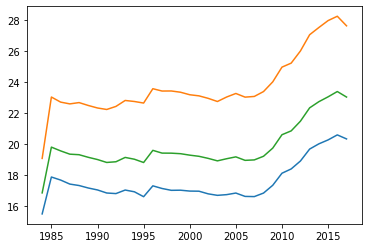

In [7]:
plt.plot(tb_agg_year)

### Investigando anomalias

Aparentemente a eficiência cresceu ao longo dos anos para as três variáveis. O gráfico acima tem duas peculiaridades: 

1. O primeiro ano apresenta uma eficiência muito menor que o segundo;
1. O último ano apresentou uma reversão na tendência de crescimento da eficiência.

Um problema de utilizar a **média** como agregador é a sensibilidade desta ao número de pontos que a compõe. Vamos analisar quanto automóveis temos em cada ano para determinar se está é a causa das anomalias acima.

**Uma Breve História de Quase Tudo** - História da gasolina com chumbo e sua proibição.

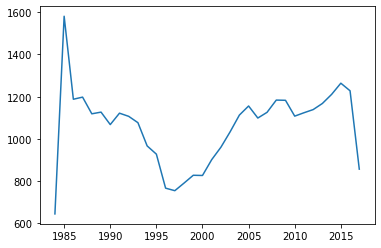

In [8]:
plt.plot(tb_veic.groupby('year')['make'].count())

In [9]:
tb_veic.groupby('year')['make'].count()

year
1984     645
1985    1581
1986    1188
1987    1198
1988    1119
1989    1127
1990    1068
1991    1122
1992    1107
1993    1077
1994     967
1995     928
1996     767
1997     755
1998     791
1999     828
2000     827
2001     902
2002     961
2003    1034
2004    1113
2005    1156
2006    1099
2007    1126
2008    1184
2009    1183
2010    1108
2011    1124
2012    1139
2013    1168
2014    1211
2015    1264
2016    1228
2017     857
Name: make, dtype: int64

In [15]:
tb_veic['year'].value_counts()

1985    1581
2015    1264
2016    1228
2014    1211
1987    1198
1986    1188
2008    1184
2009    1183
2013    1168
2005    1156
2012    1139
1989    1127
2007    1126
2011    1124
1991    1122
1988    1119
2004    1113
2010    1108
1992    1107
2006    1099
1993    1077
1990    1068
2003    1034
1994     967
2002     961
1995     928
2001     902
2017     857
1999     828
2000     827
1998     791
1996     767
1997     755
1984     645
Name: year, dtype: int64

Embora o número de automóveis apresente grande variação ano a ano, entre 1986 (terceiro ano) e 2015 (penúltimo ano), essa variação é continua (não temos saltos de ano a ano). Entretanto antes de 1986 e em 2016 temos discontinuidades (saltos). Isso pode indicar problemas na coleta de dados - algo muito comum nas *fronteiras* de um conjunto de dados.

Vamos limpar esses anos para tornar nossa análise mais assertiva.

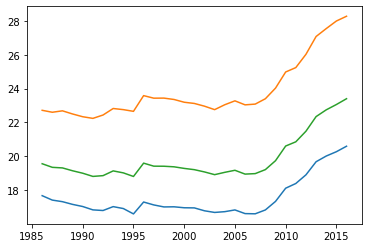

In [16]:
mask_ano = (tb_veic['year'] >= 1986) & (tb_veic['year'] <= 2016)
tb_veic = tb_veic[mask_ano]
tb_agg_year = tb_veic.groupby(by="year").agg(
    mean_city_mpg=pd.NamedAgg(column="city_mpg", aggfunc="mean"),
    mean_highway_mpg=pd.NamedAgg(column="highway_mpg", aggfunc="mean"),
    mean_combined_mpg=pd.NamedAgg(column="combined_mpg", aggfunc="mean"),
)
plt.plot(tb_agg_year)

## Aprofundando a análise

A análise acima conclui que a eficiência dos **automóveis** aumentou ao longo dos anos. No entanto, automóveis não são **motores**. Pode ser que os motores tenham se tornado menos potentes ao longo dos anos, e, por consequencia, os automóveis tornaram-se mais eficientes. 

Formulamos uma segunda hipótese: *os motores dos automóveis diminuiram em potência ao longo dos anos, levando a um aumento na eficiência geral*.

Qual variável podemos utilizar para medir a potência de um motor? Temos duas possíveis: o # de cilindros e a cilindrada (volume de deslocamento do motor). Podemos encontrar essas medidas nas variáveis `cylinders` e `engine_displacement`.

In [17]:
tb_veic[['cylinders', 'engine_displacement']].describe()

,cylinders,engine_displacement
count,32869.000000,32869.000000
mean,5.778363,3.339840
std,1.755417,1.350328
min,2.000000,0.600000
25%,4.000000,2.300000
50%,6.000000,3.000000
75%,6.000000,4.300000
max,16.000000,8.400000


Estas duas variáveis são numéricas, mas como discutimos antes, variáveis numéricas muitas vezes são **variáveis categóricas** (deveriam ser `strings`). Vamos olhar quantos valores distintos cada uma dessas variáveis assume em nosso conjunto de dados:

In [19]:
tb_veic['engine_displacement'].value_counts()

2.0    2952
3.0    2707
2.5    2124
2.4    1776
3.5    1401
       ... 
8.3       9
7.4       4
1.1       4
0.6       3
0.9       2
Name: engine_displacement, Length: 65, dtype: int64

In [20]:
tb_veic['cylinders'].value_counts()

4.0     12120
6.0     11852
8.0      7277
5.0       704
12.0      530
3.0       189
10.0      146
2.0        43
16.0        8
Name: cylinders, dtype: int64

A variável `cylinders` parece ser categórica (o que faz sentido, afinal o # de cilindros é um inteiro, e em geral entre 4, 6 e 8). Já a variável `engine_displacement` parece ser mais continua (embora exista uma concentração de observações nos valores mais comuns como 2.0 e 3.0).

Vamos tratar a variável cilindros mantendo apenas os casos mais comuns (4, 6 e 8) e utilizar a função `pd.qcut()` para discretizar a variável `engine_displacement`.

In [24]:
tb_veic['cylinders'].isin([4, 6, 8])

4         True
5         True
6         True
7         True
8         True
         ...  
35947    False
35948    False
35949    False
35950    False
35951    False
Name: cylinders, Length: 32869, dtype: bool

In [25]:
mask_cyl = tb_veic['cylinders'].isin([4, 6, 8])
tb_veic = tb_veic[mask_cyl].copy()
tb_veic['cat_ed'] = pd.qcut(tb_veic['engine_displacement'], 4, ['a', 'b', 'c', 'd'])

In [26]:
tb_veic.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year,cat_ed
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,c
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500,a
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400,a
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650,b
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500,b


In [29]:
tb_veic.loc[tb_veic['cylinders'] == 4, 'year'].value_counts().sort_index()

1986    579
1987    605
1988    519
1989    518
1990    472
1991    468
1992    439
1993    423
1994    356
1995    313
1996    311
1997    292
1998    307
1999    307
2000    294
2001    303
2002    299
2003    307
2004    316
2005    345
2006    293
2007    285
2008    301
2009    339
2010    366
2011    372
2012    406
2013    458
2014    469
2015    517
2016    541
Name: year, dtype: int64

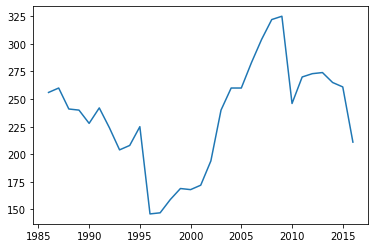

In [32]:
plt.plot(tb_veic.loc[tb_veic['cylinders'] == 8, 'year'].value_counts().sort_index())

Parece que temos algo: o crescimento de eficiência observado a partir 2005 é diretamente correlato ao aumento no # de automóveis com motores v4. Vamos construir a mesma séries para os automóveis v6 e v8.

In [33]:
tb_year_cyl4 = tb_veic.loc[tb_veic['cylinders'] == 4, 'year'].value_counts().sort_index().reset_index()
tb_year_cyl4.head()

,index,year
0,1986,579
1,1987,605
2,1988,519
3,1989,518
4,1990,472


In [34]:
tb_year_cyl4.columns = ['year', 'n_4cyl']
tb_year_cyl4.head()

,year,n_4cyl
0,1986,579
1,1987,605
2,1988,519
3,1989,518
4,1990,472


Agora vamos consolidar a criação das 3 séries em um celula só (clareza de código)...

In [35]:
tb_year_cyl4 = tb_veic.loc[tb_veic['cylinders'] == 4, 'year'].value_counts().sort_index().reset_index()
tb_year_cyl4.columns = ['year', 'n_4cyl']
tb_year_cyl6 = tb_veic.loc[tb_veic['cylinders'] == 6, 'year'].value_counts().sort_index().reset_index()
tb_year_cyl6.columns = ['year', 'n_6cyl']
tb_year_cyl8 = tb_veic.loc[tb_veic['cylinders'] == 8, 'year'].value_counts().sort_index().reset_index()
tb_year_cyl8.columns = ['year', 'n_8cyl']


... e utilizar um merge para junta-las em uma tabela única:

In [41]:
tb_year_cyl = tb_year_cyl4\
    .merge(tb_year_cyl6, on = 'year', how = 'left')\
    .merge(tb_year_cyl8, on = 'year', how = 'left')
tb_year_cyl.head()

,year,n_4cyl,n_6cyl,n_8cyl
0,1986,579,323,256
1,1987,605,289,260
2,1988,519,321,241
3,1989,518,332,240
4,1990,472,327,228


<AxesSubplot:>

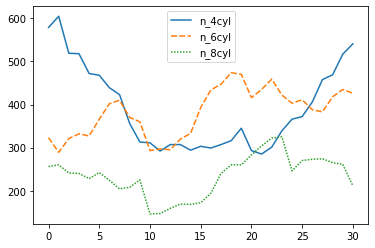

In [51]:
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(data = tb_year_cyl.drop('year', axis = 1))


Podemos fazer isso de uma maneira muito mais simples! Ainda mais se a nossa categoria tivesse muitos níveis. Como?

In [ ]:
# EXERCICIO

In [52]:
tb_year_motor = tb_year_cyl.copy()
for cat in tb_veic['cat_ed'].unique():
    tb_year_ed = tb_veic.loc[tb_veic['cat_ed'] == cat, 'year'].value_counts().sort_index().reset_index()
    tb_year_ed.columns = ['year', f'n_ed{cat}']
    tb_year_motor = tb_year_motor.merge(tb_year_ed, on = 'year', how = 'left')
tb_year_motor

,year,n_4cyl,n_6cyl,n_8cyl,n_edc,n_eda,n_edb,n_edd
0,1986,579,323,256,153,374,360,271
1,1987,605,289,260,124,397,363,270
2,1988,519,321,241,139,335,348,259
3,1989,518,332,240,155,314,367,254
4,1990,472,327,228,179,289,317,242
5,1991,468,366,242,213,305,308,250
6,1992,439,402,224,235,286,315,229
7,1993,423,410,204,248,294,290,205
8,1994,356,370,208,243,249,248,194
9,1995,313,360,225,219,221,238,220


<AxesSubplot:>

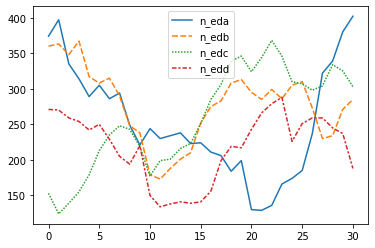

In [56]:
#plt.plot(tb_year_motor[['n_eda', 'n_edb', 'n_edc', 'n_edd']])
sns.lineplot(data = tb_year_motor[['n_eda', 'n_edb', 'n_edc', 'n_edd']])

A evolução das categorias de cilindrada é muito semelhante à evolução do # de cilindros: inicialmente temos um aumento no tamanho dos motores e, após 20005, uma reversão dessa tendência com um aumento do número de automóveis com motores menores.

## Combinando Hipóteses

Até agora nossa análise nos mostrou duas coisas:

1. A eficiência de consumo dos **automóveis** cresceu ao longo dos anos, em especial de 2005 à 2015;
1. O tamanho dos motores incialmente cresce mas, após 2005, encolhe novamente.

Uma forma de combinar essas hipóteses é analisando a evolução da eficiência de consumo para cada uma das categorias que criamos de cilindradas.

In [57]:
tb_eff_ed = tb_veic.groupby(['year', 'cat_ed'])['city_mpg'].mean().reset_index()
tb_eff_ed.head()

,year,cat_ed,city_mpg
0,1986,a,22.021390
1,1986,b,17.583333
2,1986,c,14.901961
3,1986,d,12.885609
4,1987,a,21.397985


<AxesSubplot:xlabel='year', ylabel='city_mpg'>

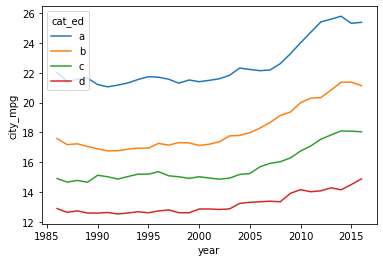

In [58]:
sns.lineplot(data = tb_eff_ed, x = 'year', y = 'city_mpg', hue = 'cat_ed')

# Análise II - O que permite um animal sonhar?

A tabela `tb_sleep` contém informações muito interessantes que nos permitem estudar sob quas condições (ecológicas e constitucionais) um animal pode sonhar (ou em quais condições um animal pode sonhar mais). Vamos investigar juntos essas condições - buscando entender o impacto dos fatores ecológicos e constitucionais sobre a capacidade de um animal sonhar.

Para começar, precisamos determinar qual será a nossa variável resposta: qual variável (ou transformação de variável!) vamos utilizar para representar a capacidade de um animal sonhar. Depois precisamos formular um hipótese clara e objetiva sobre as diferentes variáveis (ou transformação de variáveis!) que queremos avaliar.

**Referências do Heber**

**O Oraculo da Noite** - Sidarta Ribeiro

In [ ]:
tb_animals = pd.read_csv('http://www.statsci.org/data/general/sleep.txt', sep='\t')
tb_animals.head()